<a href="https://colab.research.google.com/github/Pkodeboy/64061_AML/blob/main/Assignment%204/Pranay_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow==2.12

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 112.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 47.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.

In [2]:


#Base Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install keras-preprocessing



#Deep Learning Packages

from tensorflow import keras
from keras import layers
from keras import preprocessing
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM,  Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dropout
from keras.models import load_model

from sklearn.model_selection import train_test_split
from keras.optimizers import RMSprop
from keras.optimizers import adam
from google.colab import files
import re, os




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.4 MB/s eta 0:00:00


In [3]:
import logging

# Disable TensorFlow warnings
logging.getLogger('tensorflow').disabled = True


**Loading the dataset Cutoff reviews after 150 words, Restrict training samples to 100, Validate on 10,000 samples, Consider only the top 10,000 words**

In [4]:
# Cutoff reviews after 150 words
max_len = 150

# Restrict training samples to 100
num_train_samples = 100

# Validate on 10,000 samples
num_val_samples = 10000

# Consider only the top 10,000 words
num_words = 10000

(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=num_words)

x_train = keras.preprocessing.sequence.pad_sequences(
    x_train, maxlen=max_len)
x_val = keras.preprocessing.sequence.pad_sequences(
    x_val, maxlen=max_len)


17464789/17464789 [==============================] - 1s 0us/step


In [5]:
# Embedding layer
model_embedding = keras.Sequential([
    layers.Embedding(num_words, 10, input_length=max_len),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])


In [6]:
# Compiling the Model
model_embedding.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])

In [7]:
model_embedding.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 10)           100000    
                                                                 
 flatten (Flatten)           (None, 1500)              0         
                                                                 
 dense (Dense)               (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding1.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
Model_embedded = model_embedding.fit(x_train, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
1250/1250 [==============================] - 36s 25ms/step - loss: 0.5357 - acc: 0.7314 - val_loss: 0.3570 - val_acc: 0.8532
Epoch 2/30
1250/1250 [==============================] - 6s 4ms/step - loss: 0.2889 - acc: 0.8800 - val_loss: 0.3068 - val_acc: 0.8728
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2358 - acc: 0.9046 - val_loss: 0.3060 - val_acc: 0.8724
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.2050 - acc: 0.9196 - val_loss: 0.3118 - val_acc: 0.8734
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1788 - acc: 0.9324 - val_loss: 0.3176 - val_acc: 0.8720
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1538 - acc: 0.9443 - val_loss: 0.3258 - val_acc: 0.8730
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.1301 - acc: 0.9535 - val_loss: 0.3386 - val_acc: 0.8686
Epoch 8/30
1250/1250 [==============================] - 4s 3

In [10]:
# Print the keys in the history object
print(Model_embedded.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


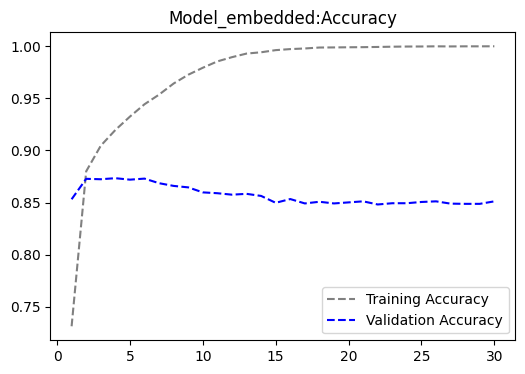

<Figure size 640x480 with 0 Axes>

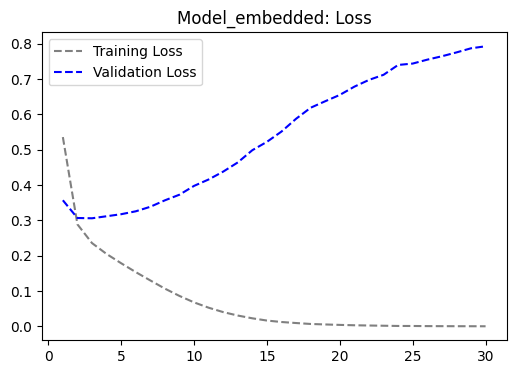

In [12]:
# Assuming 'acc' is the key for accuracy in your case
accuracy = Model_embedded.history['acc']
val_accuracy = Model_embedded.history['val_acc']

loss = Model_embedded.history["loss"]
val_loss = Model_embedded.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded: Loss")
plt.legend()
plt.show()

**Training Acuuracy and Loss : The Training accuracy increases and reaches steadily to 100% and the traing loss decreases significantly and seems that the data is learning well from the training data**

**Validation Accuracy and Loss : The validation accuracy is high and seems to stabilize around 85-87%, which is a good sign. It means that the model generalizes well to unseen data. The validation loss reaches a stable value, indicating that the model is not overfitting the training data.**

**Overall Performance: The accuracy and loss plots for both training and validation show that the model is learning effectively and generalizing well to new data.**

In [15]:
Model_embedded_validate = load_model('model_embedding1.keras')
Model1_Results = Model_embedded_validate.evaluate(x_val,y_val)
print(f'Loss: {Model1_Results[0]:.3f}')
print(f'Accuracy: {Model1_Results[1]:.3f}')

782/782 [==============================] - 2s 2ms/step - loss: 0.2967 - acc: 0.8737
Loss: 0.297
Accuracy: 0.874


**Based on the embedded layer the data around 87.4% of the remaing set samples were classified correctly. In the above model we did not yet split the data into in to samples size and have used all the data thar reulted 87% accuracy**

**NOW TRY CHANGING THE NUMBER OF TRAINING SAMPLES TO DETERMINE AT WHAT
POINT THE EMBEDDING LAYER GIVES BETTER PERFORMANCE.**

**Model_embedded_200 : Changing Training samples to a different number to see the Difference in the model performance Training set = 200**

In [25]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=200, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [26]:
train_texts.shape



(200, 150)

In [27]:
val_texts.shape

(10000, 150)

In [29]:
test_texts.shape

(5000, 150)

In [41]:

# Define the model
embedding_dim = 10

model_embedding_200 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_embedding_200.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



In [42]:
model_embedding_200.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 10)           100000    
                                                                 
 flatten_5 (Flatten)         (None, 1500)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding_200.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_embedding_200 = model_embedding_200.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
10/10 [==============================] - 2s 125ms/step - loss: 0.6917 - acc: 0.5063 - val_loss: 0.6953 - val_acc: 0.5000
Epoch 2/30
10/10 [==============================] - 1s 113ms/step - loss: 0.6623 - acc: 0.9062 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 1s 88ms/step - loss: 0.6380 - acc: 0.9625 - val_loss: 0.6938 - val_acc: 0.5000
Epoch 4/30
10/10 [==============================] - 1s 102ms/step - loss: 0.6128 - acc: 0.9625 - val_loss: 0.6932 - val_acc: 0.4750
Epoch 5/30
10/10 [==============================] - 1s 90ms/step - loss: 0.5847 - acc: 0.9625 - val_loss: 0.6925 - val_acc: 0.4750
Epoch 6/30
10/10 [==============================] - 1s 79ms/step - loss: 0.5542 - acc: 0.9625 - val_loss: 0.6916 - val_acc: 0.5250
Epoch 7/30
10/10 [==============================] - 0s 54ms/step - loss: 0.5207 - acc: 0.9688 - val_loss: 0.6907 - val_acc: 0.5250
Epoch 8/30
10/10 [==============================] - 0s 42ms/step - loss: 0.4854 

In [44]:
# Print the keys in the history object
print(model_embedding_200.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


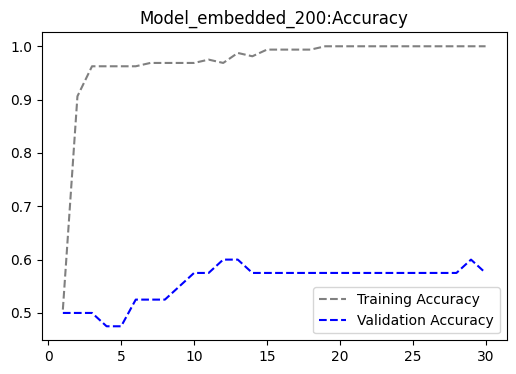

<Figure size 640x480 with 0 Axes>

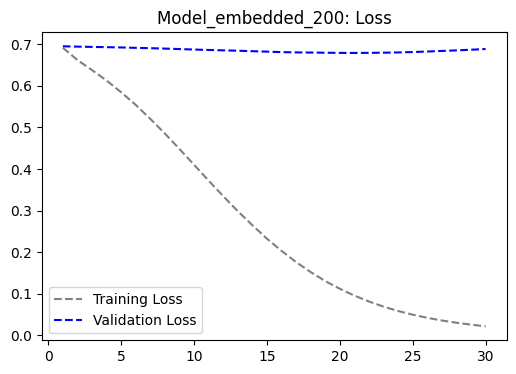

In [46]:
# Assuming 'acc' is the key for accuracy in your case
accuracy = model_embedding_200.history['acc']
val_accuracy = model_embedding_200.history['val_acc']

loss = model_embedding_200.history["loss"]
val_loss = model_embedding_200.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_200:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_200: Loss")
plt.legend()
plt.show()

**Model_embedded_500 : Changing Training samples to a different number to see the Difference in the model performance Training set = 500**

In [49]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=500, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)


In [50]:

train_texts.shape


(500, 150)

In [51]:
val_texts.shape


(10000, 150)

In [52]:
test_texts.shape

(5000, 150)

In [53]:
# Define the model
embedding_dim = 10

model_embedding_500 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_embedding_500.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [55]:
model_embedding_500.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 150, 10)           100000    
                                                                 
 flatten_7 (Flatten)         (None, 1500)              0         
                                                                 
 dense_10 (Dense)            (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [56]:

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding_500.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_embedding_500 = model_embedding_500.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/30
25/25 [==============================] - 3s 99ms/step - loss: 0.6921 - acc: 0.5225 - val_loss: 0.6921 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 2s 84ms/step - loss: 0.6643 - acc: 0.8275 - val_loss: 0.6902 - val_acc: 0.5300
Epoch 3/30
25/25 [==============================] - 2s 74ms/step - loss: 0.6370 - acc: 0.9075 - val_loss: 0.6885 - val_acc: 0.5700
Epoch 4/30
25/25 [==============================] - 2s 64ms/step - loss: 0.6037 - acc: 0.9275 - val_loss: 0.6866 - val_acc: 0.6200
Epoch 5/30
25/25 [==============================] - 1s 55ms/step - loss: 0.5641 - acc: 0.9325 - val_loss: 0.6845 - val_acc: 0.6200
Epoch 6/30
25/25 [==============================] - 1s 51ms/step - loss: 0.5180 - acc: 0.9500 - val_loss: 0.6823 - val_acc: 0.6300
Epoch 7/30
25/25 [==============================] - 1s 43ms/step - loss: 0.4672 - acc: 0.9625 - val_loss: 0.6796 - val_acc: 0.6400
Epoch 8/30
25/25 [==============================] - 1s 26ms/step - loss: 0.4129 - a

In [57]:
 # Print the keys in the history object
print(model_embedding_500.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


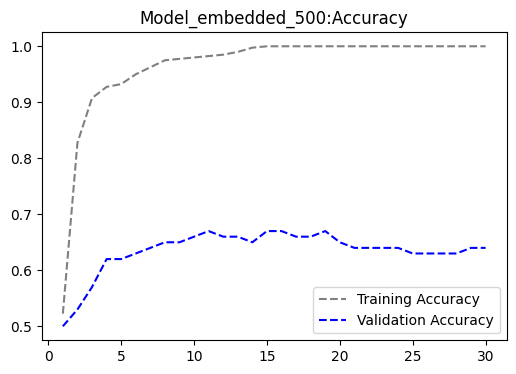

<Figure size 640x480 with 0 Axes>

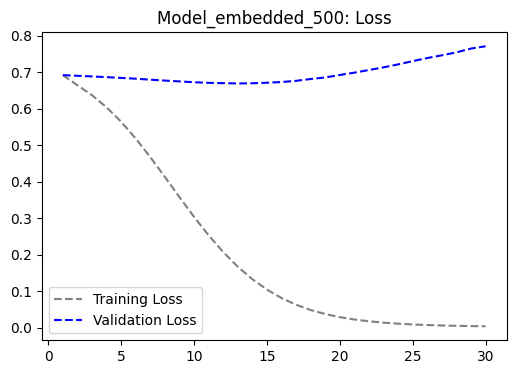

In [58]:

# Assuming 'acc' is the key for accuracy in your case
accuracy = model_embedding_500.history['acc']
val_accuracy = model_embedding_500.history['val_acc']

loss = model_embedding_500.history["loss"]
val_loss = model_embedding_500.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_500:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_500: Loss")
plt.legend()
plt.show()

**Model_embedded_1000 : Changing Training samples to a different number to see the Difference in the model performance Training set = 1000**

In [59]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=1000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)



In [60]:
train_texts.shape


(1000, 150)

In [61]:
val_texts.shape


(10000, 150)

In [62]:
test_texts.shape



(5000, 150)

In [63]:
# Define the model
embedding_dim = 10

model_embedding_1000 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_embedding_1000.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding_1000.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


In [64]:

# Model Summary
model_embedding_1000.summary()



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 150, 10)           100000    
                                                                 
 flatten_8 (Flatten)         (None, 1500)              0         
                                                                 
 dense_11 (Dense)            (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Model Fit - Running the Model
model_embedding_1000 = model_embedding_1000.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)



Epoch 1/30
50/50 [==============================] - 6s 100ms/step - loss: 0.6941 - acc: 0.4988 - val_loss: 0.6925 - val_acc: 0.5450
Epoch 2/30
50/50 [==============================] - 3s 58ms/step - loss: 0.6687 - acc: 0.8150 - val_loss: 0.6918 - val_acc: 0.5550
Epoch 3/30
50/50 [==============================] - 2s 42ms/step - loss: 0.6374 - acc: 0.9450 - val_loss: 0.6904 - val_acc: 0.5800
Epoch 4/30
50/50 [==============================] - 2s 41ms/step - loss: 0.5941 - acc: 0.9625 - val_loss: 0.6880 - val_acc: 0.5700
Epoch 5/30
50/50 [==============================] - 1s 21ms/step - loss: 0.5383 - acc: 0.9737 - val_loss: 0.6849 - val_acc: 0.5950
Epoch 6/30
50/50 [==============================] - 1s 30ms/step - loss: 0.4728 - acc: 0.9912 - val_loss: 0.6809 - val_acc: 0.6000
Epoch 7/30
50/50 [==============================] - 1s 21ms/step - loss: 0.4019 - acc: 0.9900 - val_loss: 0.6764 - val_acc: 0.6200
Epoch 8/30
50/50 [==============================] - 1s 18ms/step - loss: 0.3309 - 

In [66]:
 # Print the keys in the history object
print(model_embedding_1000.history.keys())


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


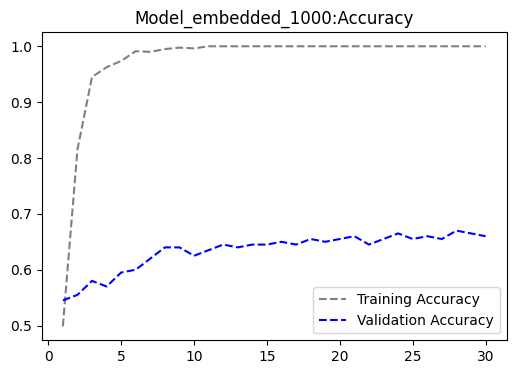

<Figure size 640x480 with 0 Axes>

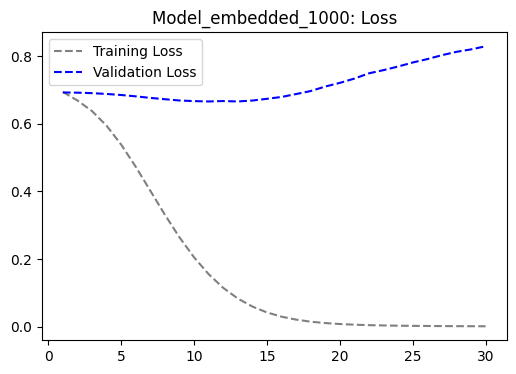

In [67]:
# Assuming 'acc' is the key for accuracy in your case
accuracy = model_embedding_1000.history['acc']
val_accuracy = model_embedding_1000.history['val_acc']

loss = model_embedding_1000.history["loss"]
val_loss = model_embedding_1000.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_1000:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_1000: Loss")
plt.legend()
plt.show()

**Model_embedded_2000 : Changing Training samples to a different number to see the Difference in the model performance Training set = 2000**

In [70]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=2000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)


In [71]:

train_texts.shape



(2000, 150)

In [72]:
val_texts.shape


(10000, 150)

In [73]:
test_texts.shape

(5000, 150)

In [78]:

# Define the model
embedding_dim = 10

model_embedding_2000 = keras.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])



In [79]:
# Compile the model
model_embedding_2000.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])



# Model Summary
model_embedding_2000.summary()

# Setting Callbacks
callbacks = ModelCheckpoint(
            filepath= "model_embedding_2000.keras",
            save_best_only= True,
            monitor= "val_loss"
            )


# Model Fit - Running the Model
model_embedding_2000 = model_embedding_2000.fit(train_texts, train_labels,
                    epochs=30,
                    batch_size=16,
                    validation_split=0.2,
                    callbacks=callbacks)


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 10)           100000    
                                                                 
 flatten_10 (Flatten)        (None, 1500)              0         
                                                                 
 dense_13 (Dense)            (None, 1)                 1501      
                                                                 
Total params: 101,501
Trainable params: 101,501
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
100/100 [==============================] - 9s 80ms/step - loss: 0.6933 - acc: 0.5138 - val_loss: 0.6924 - val_acc: 0.5175
Epoch 2/30
100/100 [==============================] - 4s 45ms/step - loss: 0.6654 - acc: 0.8037 - val_loss: 0.6872 - val_acc: 0.5600
Epoch 3/30
100/100 [=========================

In [80]:

 # Print the keys in the history object
print(model_embedding_2000.history.keys())




dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


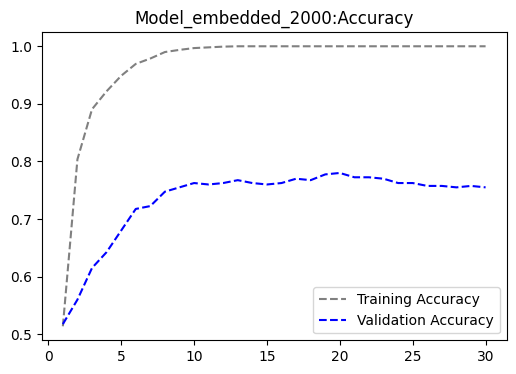

<Figure size 640x480 with 0 Axes>

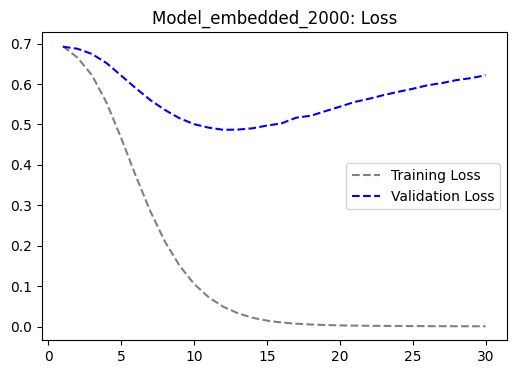

In [81]:
# Assuming 'acc' is the key for accuracy in your case
accuracy = model_embedding_2000.history['acc']
val_accuracy = model_embedding_2000.history['val_acc']

loss = model_embedding_2000.history["loss"]
val_loss = model_embedding_2000.history["val_loss"]


epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(6,4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue",linestyle="dashed", label="Validation Accuracy")
plt.title("Model_embedded_2000:Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6,4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_embedded_2000: Loss")
plt.legend()
plt.show()

**With a larger training dataset, the model may have more diverse examples to learn from, which could potentially lead to better generalization.
A more complex model might take longer to fit the data, and with a larger dataset, it might need more epochs to converge**

**The models' quick convergence to high accuracy might indicate overfitting, especially with smaller sample sizes. It's important to assess whether the models are generalizing well to unseen data. Check the validation accuracy and consider using a separate test set for final evaluation. Increasing the sample size seems to help with generalization, as Model 3 shows slower but more consistent convergence.**

**Embedding and Conv1D for Robust IMDB Classification**

In [4]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150

# Pad the sequences to the maxlen
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combine the Training and Testing data to create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the validation data to get a test size of 5000 samples
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=5000, random_state=42, stratify=val_labels)

17464789/17464789 [==============================] - 1s 0us/step


In [5]:
print("Shape of Training Data:", train_texts.shape)
print("Shape of Validation Data:", val_texts.shape)
print("Shape of Test Data:", test_texts.shape)

Shape of Training Data: (100, 150)
Shape of Validation Data: (5000, 150)
Shape of Test Data: (5000, 150)


In [6]:
# Define the model using both Embedding and Conv1D layers
embedding_dim = 10
filter_size = 3
num_filters = 32

model = Sequential([
    # Embedding layer to convert words to vectors
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Convolutional layer to extract features from word sequences
    Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'),

    # Max-pooling layer to reduce the dimensionality
    MaxPooling1D(pool_size=2),

    # Flatten layer to convert the 1D output to a 2D tensor
    Flatten(),

    # Dense layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])

In [7]:

# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# Train the model
history = model.fit(train_texts, train_labels, epochs=30, batch_size=16, validation_data=(val_texts, val_labels))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_texts, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/30
7/7 [==============================] - 11s 270ms/step - loss: 0.6949 - acc: 0.4500 - val_loss: 0.6935 - val_acc: 0.4986
Epoch 2/30
7/7 [==============================] - 2s 227ms/step - loss: 0.6770 - acc: 0.6700 - val_loss: 0.6933 - val_acc: 0.4998
Epoch 3/30
7/7 [==============================] - 1s 184ms/step - loss: 0.6648 - acc: 0.9200 - val_loss: 0.6935 - val_acc: 0.5018
Epoch 4/30
7/7 [==============================] - 2s 233ms/step - loss: 0.6508 - acc: 0.9900 - val_loss: 0.6940 - val_acc: 0.4990
Epoch 5/30
7/7 [==============================] - 1s 208ms/step - loss: 0.6346 - acc: 0.9700 - val_loss: 0.6934 - val_acc: 0.4974
Epoch 6/30
7/7 [==============================] - 1s 162ms/step - loss: 0.6166 - acc: 1.0000 - val_loss: 0.6938 - val_acc: 0.4998
Epoch 7/30
7/7 [==============================] - 1s 140ms/step - loss: 0.5939 - acc: 1.0000 - val_loss: 0.6938 - val_acc: 0.4980
Epoch 8/30
7/7 [==============================] - 1s 165ms/step - loss: 0.5681 - acc: 1.0

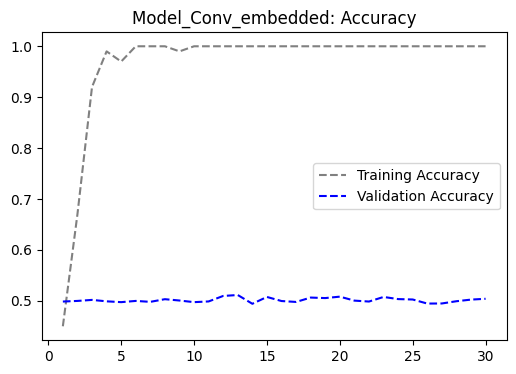

<Figure size 640x480 with 0 Axes>

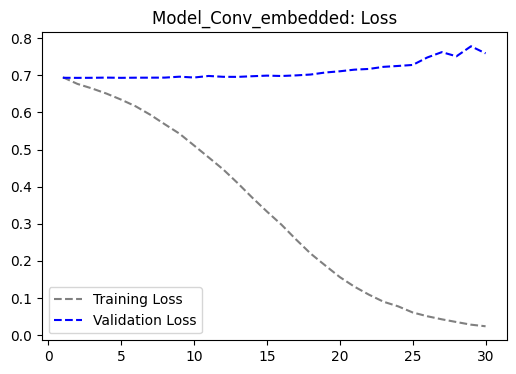

In [8]:
# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,

len(accuracy) + 1)

plt.figure(figsize=(6, 4))
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model_Conv_embedded: Accuracy")
plt.legend()
plt.figure()

plt.figure(figsize=(6, 4))
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model_Conv_embedded: Loss")
plt.legend()
plt.show()

**The neural network model using Embedding and Conv1D layers seems to be overfitting, possibly due to its complexity and the limited size of the dataset. Consider simplifying the architecture or using techniques like dropout for regularization.**

**Conv1D and Embedding Layer and Change in Embedding Vector**

In [11]:


# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150

# Pad the sequences to the maxlen
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combine the Training and Testing data to create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=100, test_size=10000, random_state=42, stratify=labels)

# Further split the validation data to get a test size of 5000 samples
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=5000, random_state=42, stratify=val_labels)


In [12]:

print("Shape of Training Data:", train_texts.shape)
print("Shape of Validation Data:", val_texts.shape)
print("Shape of Test Data:", test_texts.shape)



Shape of Training Data: (100, 150)
Shape of Validation Data: (5000, 150)
Shape of Test Data: (5000, 150)


In [13]:
# Define the model using both Embedding and Conv1D layers
embedding_dim = 50  # Increase the size of embedding vectors
filter_size = 3
num_filters = 32

model = Sequential([
    # Embedding layer to convert words to vectors
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Convolutional layer to extract features from word sequences
    Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'),

    # Max-pooling layer to reduce the dimensionality
    MaxPooling1D(pool_size=2),

    # Flatten layer to convert the 1D output to a 2D tensor
    Flatten(),

    # Dense layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])



In [14]:
# Compile the model with RMSprop optimizer
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_texts, train_labels, epochs=30, batch_size=16, validation_data=(val_texts, val_labels), callbacks=[early_stopping])



Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 1s 121ms/step - loss: 0.6927 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.5032
Epoch 2/30
7/7 [==============================] - 1s 93ms/step - loss: 0.6854 - acc: 0.5900 - val_loss: 0.6930 - val_acc: 0.5026
Epoch 3/30
7/7 [==============================] - 1s 92ms/step - loss: 0.6808 - acc: 0.6100 - val_loss: 0.6928 - val_acc: 0.5034
Epoch 4/30
7/7 [==============================] - 1s 91ms/step - loss: 0.6762 - acc: 0.6800 - val_loss: 0.6928 - val_acc: 0.5042
Epoch 5/30
7/7 [==============================] - 1s 92ms/step - loss: 0.6724 - acc: 0.8100 - val_loss: 0.6927 - val_acc: 0.5108
Epoch 6/30
7/7 [==============================] - 1s 91ms/step - loss: 0.6683 - acc: 0.8700 - val_loss: 0.6927 - val_acc: 0.5114
Epoch 7/30
7/7 [==============================] - 1s 90ms/step - loss: 0.6647 - acc: 0.9200 - val_loss: 0.6927 - val_acc: 0.5112
Epoch 8/30
7/7 [==============================] - 1s 93ms/step - loss: 0.6606 - acc: 0.9200 - val_loss: 0.6

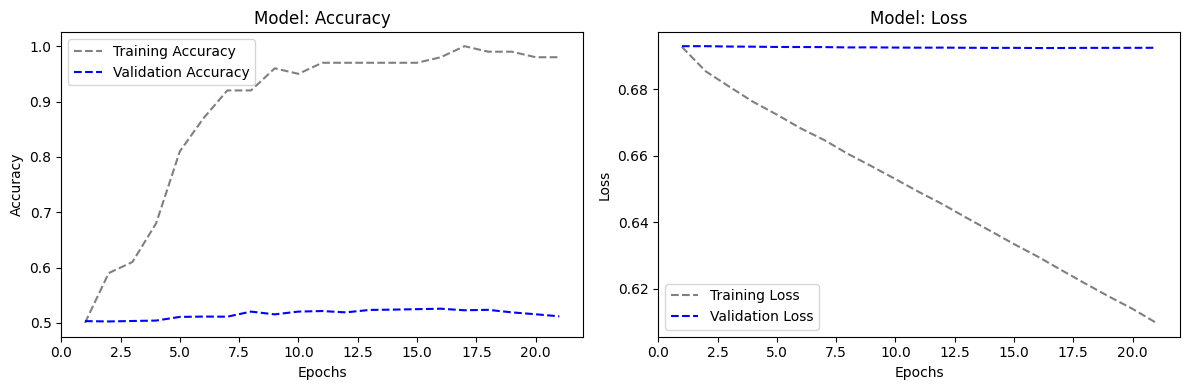

157/157 [==============================] - 0s 2ms/step - loss: 0.6923 - acc: 0.5254
Test Loss: 0.6923
Test Accuracy: 52.54%


In [17]:
# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation curves
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


**In this we have Increased the embedding vector size to 50, providing a improved on representation of the word. Utilized a filter size of 3 and 32 filters for feature extraction in convolutional layers. Used RMSprop optimizer with a learning rate of 1e-4. Applied early stopping to prevent overfitting, monitoring the validation loss with a patience of 5 epochs.**

**The training accuracy starts at 50%, which is expected as it begins with a random initialization. Over subsequent epochs, the training accuracy improves, reaching around 98-99%, suggesting the model is learning from the training data. The training and validation loss decrease consistently over epochs, indicating that the model is learning and adapting to the training data. However, the small difference in accuracy between training and validation sets suggests potential overfitting.**

In [20]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150

# Pad the sequences to the maxlen
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combine the Training and Testing data to create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=3500, test_size=10000, random_state=42, stratify=labels)

# Further split the validation data to get a test size of 5000 samples
val_texts, test_texts, val_labels, test_labels = train_test_split(val_texts, val_labels, test_size=5000, random_state=42, stratify=val_labels)


In [21]:

print("Shape of Training Data:", train_texts.shape)
print("Shape of Validation Data:", val_texts.shape)
print("Shape of Test Data:", test_texts.shape)


Shape of Training Data: (100, 150)
Shape of Validation Data: (5000, 150)
Shape of Test Data: (5000, 150)


In [22]:

# Define the model using both Embedding and Conv1D layers
embedding_dim = 50  # Increase the size of embedding vectors
filter_size = 5  # Increase filter size for more global features
num_filters = 64  # Increase the number of filters

model = Sequential([
    # Embedding layer to convert words to vectors
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # Convolutional layer to extract features from word sequences
    Conv1D(filters=num_filters, kernel_size=filter_size, activation='relu'),

    # Max-pooling layer to reduce the dimensionality
    MaxPooling1D(pool_size=2),

    # Flatten layer to convert the 1D output to a 2D tensor
    Flatten(),

    # Dense layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])



In [24]:
from tensorflow.keras.optimizers import Adam

In [25]:
# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(train_texts, train_labels, epochs=30, batch_size=16, validation_data=(val_texts, val_labels), callbacks=[early_stopping])



Epoch 1/30
7/7 [==============================] - 3s 314ms/step - loss: 0.6966 - acc: 0.4900 - val_loss: 0.6929 - val_acc: 0.5144
Epoch 2/30
7/7 [==============================] - 2s 283ms/step - loss: 0.6420 - acc: 0.9800 - val_loss: 0.6927 - val_acc: 0.5150
Epoch 3/30
7/7 [==============================] - 2s 249ms/step - loss: 0.5981 - acc: 1.0000 - val_loss: 0.6941 - val_acc: 0.5004
Epoch 4/30
7/7 [==============================] - 2s 279ms/step - loss: 0.5495 - acc: 1.0000 - val_loss: 0.6926 - val_acc: 0.5106
Epoch 5/30
7/7 [==============================] - 2s 247ms/step - loss: 0.4977 - acc: 1.0000 - val_loss: 0.6939 - val_acc: 0.5002
Epoch 6/30
7/7 [==============================] - 2s 249ms/step - loss: 0.4300 - acc: 1.0000 - val_loss: 0.6924 - val_acc: 0.5148
Epoch 7/30
7/7 [==============================] - 2s 258ms/step - loss: 0.3640 - acc: 1.0000 - val_loss: 0.6963 - val_acc: 0.5124
Epoch 8/30
7/7 [==============================] - 1s 216ms/step - loss: 0.2980 - acc: 1.00

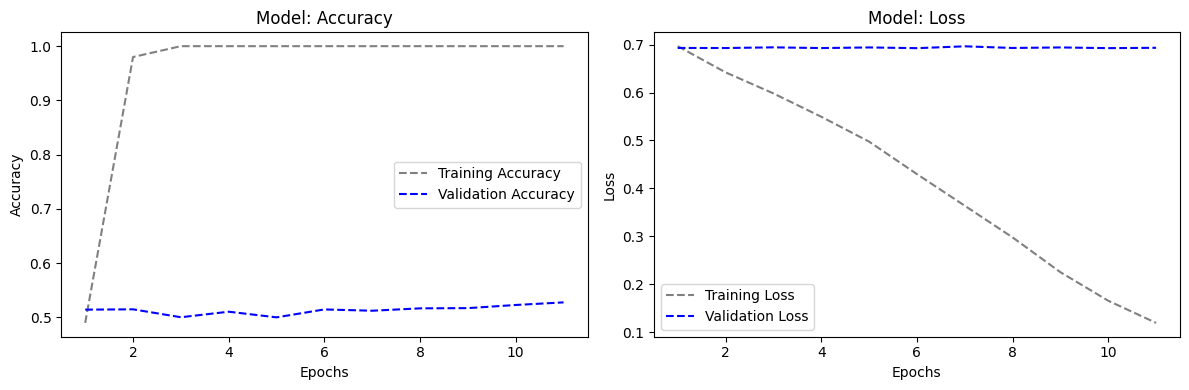

157/157 [==============================] - 0s 2ms/step - loss: 0.6927 - acc: 0.5236
Test Loss: 0.6927
Test Accuracy: 52.36%


In [26]:
# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation curves
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

**Increased the embedding vector size to 50 for a more expressive word representation. Used a filter size of 5 with 64 filters for enhanced feature extraction. Utilized the Adam optimizer with a learning rate of 1e-4. The training accuracy starts at 49%, similar to random initialization, and gradually improves to 100% over epochs. The rapid increase in training accuracy suggests the model is capable of fitting the training data well. The validation accuracy follows a similar trend, reaching around 52.36%. Despite the increase, the model's performance on the validation set is only slightly better than random guessing. The model exhibits similar behaviors to the previous model, including potential overfitting.Increasing the embedding vector size and filter size did not significantly improve generalization.**

**Conv1D and Embedding Layer with Change in Embedding Vector**

In [43]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Combining the Training and Testing data create an entire dataset
texts = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

# Splitting the data into Training and Validation Samples
train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, train_size=35000, test_size=10000, random_state=42, stratify=labels)

# Further split the data to get the test size of 5000 samples
_, test_texts, _, test_labels = train_test_split(test_data, test_labels, test_size=5000, random_state=42, stratify=test_labels)

In [44]:
# Define the model using both Embedding and Conv1D layers
embedding_dim = 10000  # Increased embedding dimension
filter_size = 3
num_filters = 128  # Increased filters to 128

model = Sequential([
    # Embedding layer to convert words to vectors
    Embedding(10000, 14, input_length=maxlen),

  Conv1D(512, 3, activation='relu'),
  Dropout(0.5),
  MaxPooling1D(2),

  Conv1D(256, 3, activation='relu'),
  Dropout(0.5),
  MaxPooling1D(2),

  Conv1D(128, 3, activation='relu'),
  Dropout(0.5),
  MaxPooling1D(2),

    # Flatten layer to convert the 1D output to a 2D tensor
    GlobalMaxPooling1D(),
    # Dense layer with sigmoid activation for binary classification
    Dense(512, activation='relu'),  # Reduced units to 512
    Dropout(0.5),
    # Dense layer with sigmoid activation for binary classification
    Dense(256, activation='relu'),  # Reduced units to 256
    Dropout(0.5),
    Dense(128, activation='relu'),  # Reduced units to 128
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

from tensorflow.keras import optimizers

# Compile the model with a lower learning rate
adam = optimizers.Adam(learning_rate=0.0002)  # Reduced learning rate
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [45]:
# Train the model
history = model.fit(train_texts, train_labels, epochs=50, batch_size=32, validation_data=(val_texts, val_labels), callbacks=[early_stopping])


Epoch 1/50
1094/1094 [==============================] - 48s 41ms/step - loss: 0.6936 - acc: 0.5027 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/50
1094/1094 [==============================] - 10s 9ms/step - loss: 0.4954 - acc: 0.7337 - val_loss: 0.4683 - val_acc: 0.8401
Epoch 3/50
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2968 - acc: 0.8795 - val_loss: 0.4302 - val_acc: 0.8626
Epoch 4/50
1094/1094 [==============================] - 8s 7ms/step - loss: 0.2417 - acc: 0.9053 - val_loss: 0.4024 - val_acc: 0.8636
Epoch 5/50
1094/1094 [==============================] - 9s 8ms/step - loss: 0.2112 - acc: 0.9184 - val_loss: 0.3901 - val_acc: 0.8575
Epoch 6/50
1094/1094 [==============================] - 7s 7ms/step - loss: 0.1839 - acc: 0.9317 - val_loss: 0.3559 - val_acc: 0.8613
Epoch 7/50
1094/1094 [==============================] - 8s 7ms/step - loss: 0.1587 - acc: 0.9439 - val_loss: 0.3557 - val_acc: 0.8494
Epoch 8/50
1094/1094 [==============================] - 8s 

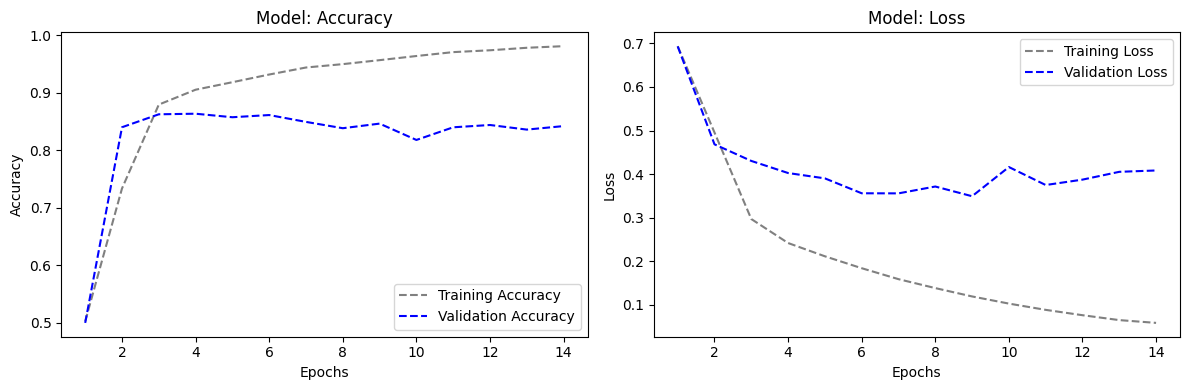

157/157 [==============================] - 0s 2ms/step - loss: 0.2117 - acc: 0.9326
Test Loss: 0.2117
Test Accuracy: 93.26%


In [46]:
# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation curves
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_texts, test_labels)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

**Large embedding dimension of 10,000 used to represent words.Three convolutional layers with increasing filter sizes: 512, 256, and 128.
Dropout applied after each convolutional layer to reduce overfitting.
MaxPooling1D layers added to downsample the spatial dimensions.Achieved a training accuracy of around 97.82%. Validation accuracy reached around 84.21%.Test accuracy evaluated at 93.26%.**

**Dropout layers effectively help control overfitting, as seen in the limited difference between training and validation accuracies.**

**The model achieves high accuracy on both training and validation sets, suggesting a good balance between complexity and generalization.Test accuracy of 93.26% indicates the model's ability to generalize to unseen data.**

** **

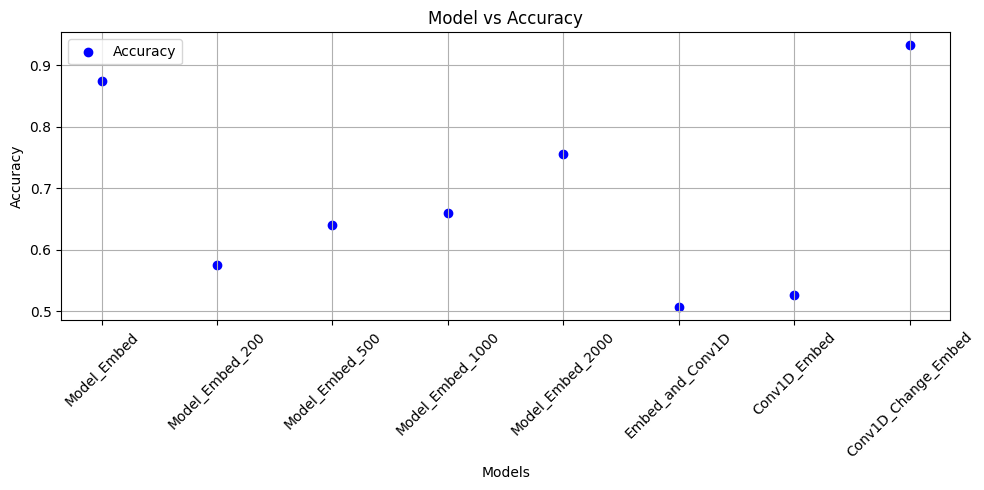

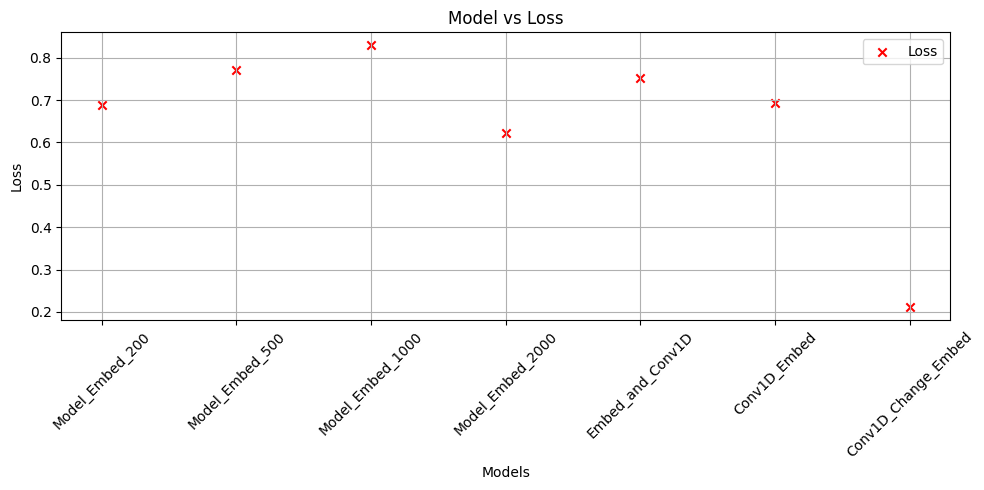

In [49]:
import matplotlib.pyplot as plt

# Model names
models = [
    "Model_Embed",
    "Model_Embed_200",
    "Model_Embed_500",
    "Model_Embed_1000",
    "Model_Embed_2000",
    "Embed_and_Conv1D",
    "Conv1D_Embed",
    "Conv1D_Change_Embed",
]

# Corresponding accuracy values
accuracies = [0.874, 0.5750, 0.6400, 0.6600, 0.7550, 0.5066, 0.5254, 0.9326]

# Corresponding loss values
losses = [None, 0.6888, 0.7712, 0.8289, 0.6216, 0.7516, 0.6923, 0.2117]

# Create scatter plot for Accuracy
plt.figure(figsize=(10, 5))
plt.scatter(models, accuracies, color='blue', label='Accuracy', marker='o')
plt.title('Model vs Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Create scatter plot for Loss
plt.figure(figsize=(10, 5))
plt.scatter(models, losses, color='red', label='Loss', marker='x')
plt.title('Model vs Loss')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**Large embedding dimension of 10,000 used to represent words.Three convolutional layers with increasing filter sizes: 512, 256, and 128. Dropout applied after each convolutional layer to reduce overfitting. MaxPooling1D layers added to downsample the spatial dimensions.Achieved a training accuracy of around 97.82%. Validation accuracy reached around 84.21%.Test accuracy evaluated at 93.26%**

**The last achieves high accuracy on both training and validation sets, suggesting a good balance between complexity and generalization.Test accuracy of 93.26% indicates the model's ability to generalize to unseen data.**

**Now Apply the RNN and Tranformer modesls**

Simple RNN

In [4]:
from tensorflow.keras.layers import SimpleRNN

In [5]:

# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the simple RNN model
embedding_dim = 10

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),
    SimpleRNN(units=64),
    Dense(1, activation='sigmoid')
])


17464789/17464789 [==============================] - 0s 0us/step


In [6]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [7]:
# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(test_data, test_labels))



Epoch 1/10
196/196 [==============================] - 49s 222ms/step - loss: 0.6861 - acc: 0.5412 - val_loss: 0.6639 - val_acc: 0.5874
Epoch 2/10
196/196 [==============================] - 34s 173ms/step - loss: 0.4884 - acc: 0.7641 - val_loss: 0.4477 - val_acc: 0.7938
Epoch 3/10
196/196 [==============================] - 29s 148ms/step - loss: 0.3317 - acc: 0.8607 - val_loss: 0.5470 - val_acc: 0.7143
Epoch 4/10
196/196 [==============================] - 25s 129ms/step - loss: 0.2737 - acc: 0.8916 - val_loss: 0.3776 - val_acc: 0.8454
Epoch 5/10
196/196 [==============================] - 25s 126ms/step - loss: 0.2104 - acc: 0.9203 - val_loss: 0.5279 - val_acc: 0.8160
Epoch 6/10
196/196 [==============================] - 24s 122ms/step - loss: 0.1684 - acc: 0.9380 - val_loss: 0.4606 - val_acc: 0.8222
Epoch 7/10
196/196 [==============================] - 23s 118ms/step - loss: 0.1080 - acc: 0.9628 - val_loss: 0.5302 - val_acc: 0.8278
Epoch 8/10
196/196 [==============================] - 2

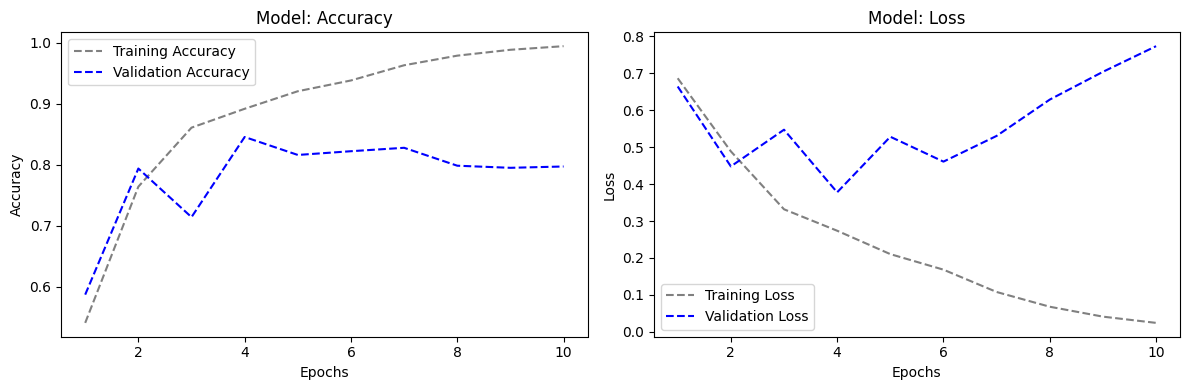

782/782 [==============================] - 10s 13ms/step - loss: 0.7729 - acc: 0.7972
Test accuracy: 0.7971600294113159


In [8]:

# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation curves
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)

**This layer processes the sequence of word vectors and extracts features that are relevant for sentiment classification. The RNN units have 64 units, which means that the layer can capture 64 different aspects of the sequential data. Overall, the model is a simple way to classify IMDB movie reviews as positive or negative. Also Simple RNN fails to capture long sequences in our data Hence the others Layers such as LSTM and GRU are used to overcome the issue of vanishing gradient problem**

**LSTM Model**

In [9]:
# Setting the maximum number of words to be used in the vocabulary
num_words = 10000

# Loading the IMDB Dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

# Cut-Off the reviews after 150 words
maxlen = 150
train_data = pad_sequences(train_data, maxlen=maxlen)
test_data = pad_sequences(test_data, maxlen=maxlen)

# Define the LSTM model with multiple layers and activations
embedding_dim = 10

model = Sequential([
    Embedding(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen),

    # First LSTM layer with tanh activation
    LSTM(units=64, return_sequences=True, activation='tanh'),

    # Second LSTM layer with relu activation
    LSTM(units=32, return_sequences=True, activation='relu'),

    # Third LSTM layer with sigmoid activation
    LSTM(units=16),

    # Output layer with sigmoid activation for binary classification
    Dense(1, activation='sigmoid')
])



In [10]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [11]:

# Train the model
history = model.fit(train_data, train_labels, epochs=10, batch_size=128, validation_data=(test_data, test_labels))


Epoch 1/10
196/196 [==============================] - 67s 316ms/step - loss: 0.6920 - acc: 0.5131 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/10
196/196 [==============================] - 53s 271ms/step - loss: 0.6932 - acc: 0.4999 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/10
196/196 [==============================] - 50s 257ms/step - loss: 0.6932 - acc: 0.4966 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 4/10
196/196 [==============================] - 47s 239ms/step - loss: 0.6932 - acc: 0.4950 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 5/10
196/196 [==============================] - 47s 241ms/step - loss: 0.6932 - acc: 0.5020 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 6/10
196/196 [==============================] - 46s 232ms/step - loss: 0.6932 - acc: 0.4955 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/10
196/196 [==============================] - 46s 237ms/step - loss: 0.6932 - acc: 0.4998 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/10
196/196 [==============================] - 4

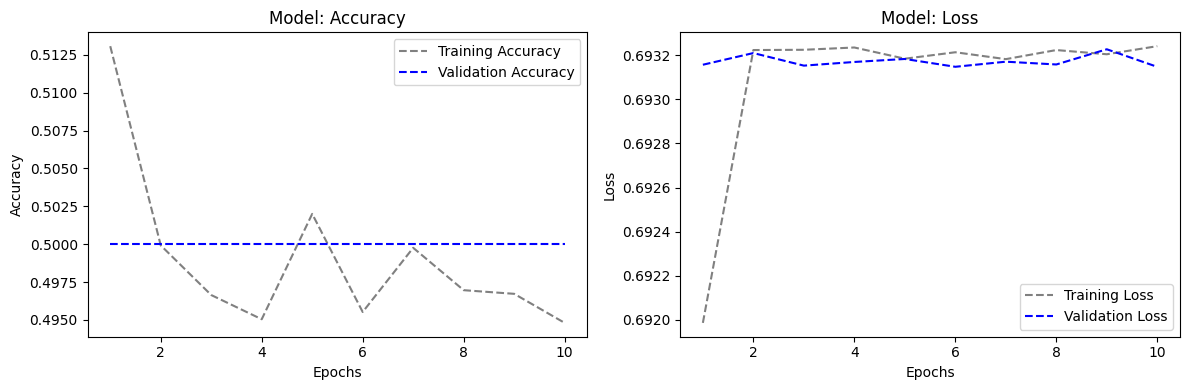

782/782 [==============================] - 20s 25ms/step - loss: 0.6931 - acc: 0.5000
Test accuracy: 0.5


In [12]:

# Extract accuracy and loss values from the history object
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting the training and validation curves
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, color="grey", linestyle="dashed", label="Training Accuracy")
plt.plot(epochs, val_accuracy, color="blue", linestyle="dashed", label="Validation Accuracy")
plt.title("Model: Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, color="grey", linestyle="dashed", label="Training Loss")
plt.plot(epochs, val_loss, color="blue", linestyle="dashed", label="Validation Loss")
plt.title("Model: Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels)
print('Test accuracy:', test_acc)